# Perceptions&Interactions TP2 - Traitement d'image

## Introduction

*Imports et chargement d'image*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

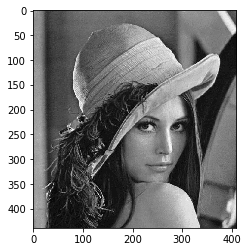

In [2]:
img = cv2.imread("lena_gray.png")
plt.imshow(img)
plt.show()

## <span style="color:red">Correction</span>

<span style="color:red">Les corrections et notes supplémentaires seront écrites en rouge.</span>

> ### **1. Histogramme d'intensité**
> 
> Codez la fonction histogram qui calcule l'histogramme d'intensité d'une image en niveaux de gris et affichez-le. L'histogramme d'intensité d'une image peut être vu comme un tableau à une dimension dont chaque case contient le nombre de pixels à une certaine valeur d'intensité.
> 
> Après avoir codé la fonction, décommentez la dernière ligne pour afficher l'histogramme sous forme de barres. Vous pouvez trouver un exemple de résultat attendu dans results/histogram.png.

<BarContainer object of 256 artists>

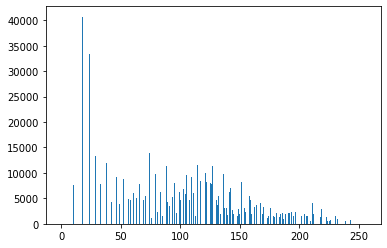

In [3]:
def histogram(img):
    hist = np.zeros((256))
    
    (h, w, c) = img.shape
    for i in range(h):
        for j in range(w):
            for k in range(c):
                hist[img[i, j, k]] += 1
    return hist

hist = histogram(img)
plt.bar(np.arange(len(hist)), hist)

> ### **2. Normalisation**
> 
> Codez la fonction normalize. Cette fonction a pour effet de réduire ou d'augmenter le contraste, respectivement en comprimant ou en étirant les valeurs d'intensité de l'image d'entrée vers les valeurs val_min et val_max. Faites attention aux types (uint8, float...), leur déclaration étant implicite en Python.
> 
> Affichez l'image après normalisation avec val_min = 100 et val_max = 125. Vous pouvez trouver un exemple de résultat attendu dans results/lena_normalized.png.

<span style="color:red">Ajout plus bas de versions v2 et v3 de la fonction normalize, plus courtes et rapides que la version demandée.</span>

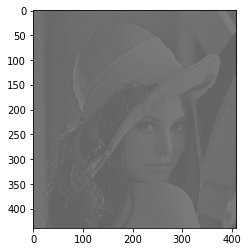

In [4]:
# Version détaillée.
def normalize(img, new_min, new_max):
    #new_img = np.zeros(img.shape)
    # ou
    new_img = img.copy()
    
    old_min = np.min(img)
    old_max = np.max(img)
    
    (h, w, c) = img.shape
    for i in range(h):
        for j in range(w):
            for k in range(c):
                val = img[i, j, k]
                
                # [10, 243] -> [0, 233]
                val -= old_min
                
                # [0, 233] -> [0, 1]
                val /= (old_max - old_min)
                
                # [0, 1] -> [0, 25]
                val *= (new_max - new_min)
                
                # [0, 25] -> [100, 125]
                val += new_min
                
                new_img[i, j, k] = val
    return new_img

img_normalized = normalize(img, 100, 125)
img_normalized = img_normalized.astype(np.uint8)
plt.imshow(img_normalized)

<span style="color:red">ou</span>

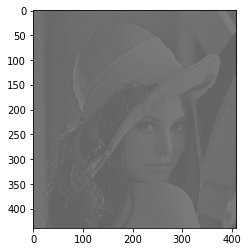

In [5]:
# Version courte, raccourcie pour éviter d'utiliser les boucles.
# Les traitements sont appliqués directement sur l'image entière
# plutôt que sur chaque pixel individuellement.
# Beaucoup plus rapide en Python, mais souvent interdit dans les
# autres langages.
def normalize_v2(img, new_min, new_max):
    old_min = np.min(img)
    old_max = np.max(img)
    
    tmp_img = img - old_min # Crée automatiquement une copie de l'image et agit dessus
    tmp_img = tmp_img / (old_max - old_min)
    tmp_img = tmp_img * (new_max - new_min)
    tmp_img = tmp_img + new_min
    return tmp_img

img_normalized = normalize_v2(img, 100, 125)
img_normalized = img_normalized.astype(np.uint8)
plt.imshow(img_normalized)

<span style="color:red">ou</span>

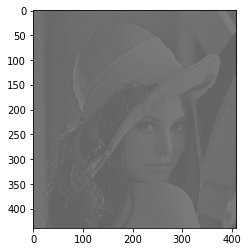

In [6]:
# Version encore plus courte.
# Une seule ligne, à l'exception des calculs de old_min et old_max.
def normalize_v3(img, new_min, new_max):
    old_min = np.min(img)
    old_max = np.max(img)
    
    return (img - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

img_normalized = normalize_v3(img, 100, 125)
img_normalized = img_normalized.astype(np.uint8)
plt.imshow(img_normalized)

### <span style="color:red">Comparons le temps d'utilisation de ces 3 versions</span>

In [7]:
import time

start = time.time()
normalize(img, 100, 125)
end = time.time()
print("Temps pour la fonction normalize():", end - start, "secondes.")

start = time.time()
normalize_v2(img, 100, 125)
end = time.time()
print("Temps pour la fonction normalize_v2():", end - start, "secondes.")

start = time.time()
normalize_v3(img, 100, 125)
end = time.time()
print("Temps pour la fonction normalize_v3():", end - start, "secondes.")

Temps pour la fonction normalize(): 3.4900050163269043 secondes.
Temps pour la fonction normalize_v2(): 0.019999980926513672 secondes.
Temps pour la fonction normalize_v3(): 0.009999752044677734 secondes.


<span style="color:red">Les résultats peuvent varier d'une itération à l'autre et selon les machines, mais j'ai eu pour ma part un temps d'environ 3.5s pour la première version de normalize (avec les boucles), et proche de 0.01s pour v2 et v3. C'est dû au fait que les boucles sont particulièrement coûteuse en Python, qui est davantage optimisé pour des opérations sur des tableaux et matrices.</span>

<span style="color:red">Dans un premier temps, il est plus important de prendre en main certaines fonctions et certains calculs sans se soucier du temps de calcul. Ensuite, lorsque cela sera possible et en fonction du temps disponible, il pourra être nécessaire d'optimiser certaines fonctions.</span>

> #### **Relation entre histogramme et normalisation**
> 
> Affichez à nouveau l'histogramme, cette fois-ci sur l'image normalisée, et constatez les changements. Vous pouvez essayer de modifier les val_min et val_max de la fonction normalize puis d'afficher à nouveau l'histogramme. Qu'en concluez-vous ?

<span style="color:red">Réponse : L'histogramme s'en retrouve compressé (ou étiré) vers l'intervalle sélectionné. Les valeurs étant au final converties en integers, une perte d'informations se fait dans l'image. Ce problème est particulièrement visible en effectuant une première normalisation vers un domaine plus étroit (ex : [10, 243] → [100, 125]) et une deuxième normalisation vers un domaine plus large (ex : [100, 125] → [10, 243]).</span>

<BarContainer object of 256 artists>

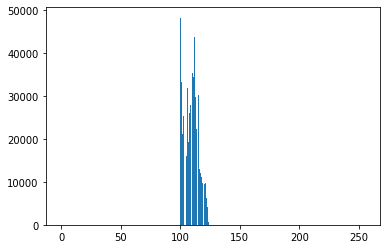

In [8]:
new_min = 100
new_max = 125

img_normalized = normalize_v2(img, new_min, new_max).astype(np.uint8)
hist = histogram(img_normalized)
plt.bar(np.arange(len(hist)), hist)

> ### **3. Débruitage et convolution**
> 
> Dû à un problème informatique, l'image de Lena s'est retrouvée recouverte de bruit.

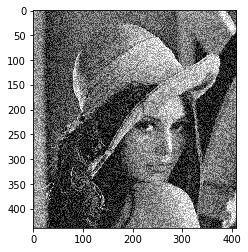

In [9]:
img_bruitee = cv2.imread("lena_bruitee.png")
plt.imshow(img_bruitee)
plt.show()

> Le bruit affectant l'image étant du bruit blanc (aléatoire), il est possible de s'approcher de l'image originale en prenant pour chaque pixel la moyenne de lui-même et de chacun de ses voisins.
> 
> Écrivez une fonction moyenne_voisins qui crée une nouvelle image, dans laquelle chaque pixel est égal à la moyenne de son voisinnage de l'image originale. Affichez ensuite cette image. Vous pouvez trouver un exemple de résultat dans resultats/lena_debruitee.png.
> 
> Notes : Les bords des images seront ignorés. Cette fois encore, faites attention aux types (uint8, float...).

<span style="color:red">Ajout plus bas de la version v2 de la fonction normalize, plus courte et rapide.</span>

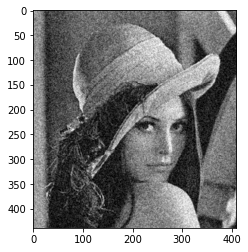

In [10]:
def moyenne_voisins(img):
    # ...
    new_img = img.copy()
    
    old_min = np.min(img)
    old_max = np.max(img)
    
    (h, w, c) = img.shape
    for i in range(1, h-1):
        for j in range(1, w-1):
            for k in range(c):
                tmp = 0
                for x in range(-1, 2):
                    for y in range(-1, 2):
                        tmp += img[i+x, j+y, k]
                new_img[i, j, k] = tmp // 9 # division entière pour garder des int
    return new_img

img_debruitee = moyenne_voisins(img_bruitee)
plt.imshow(img_debruitee)

<span style="color:red">ou</span>

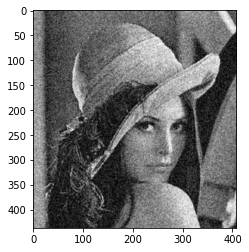

In [11]:
def moyenne_voisins_v2(img):
    # Conversion vers int16 nécessaire pour dépasser la valeur 255
    tmp_img = img.copy().astype(np.int16)
    # Chaque "nouvelle" ligne contient la somme de trois "anciennes" lignes consécutives
    tmp_img = (tmp_img[:-2, :, :] + tmp_img[1:-1, :, :] + tmp_img[2:, :, :])
    # Chaque "nouvelle" colonne contient la somme de trois "anciennes" colonnes consécutives
    tmp_img = (tmp_img[:, :-2, :] + tmp_img[:, 1:-1, :] + tmp_img[:, 2:, :])
    return tmp_img // 9

img_debruitee = moyenne_voisins_v2(img_bruitee)
plt.imshow(img_debruitee)

> Observez le résultat. Qu'en concluez-vous sur l'opération effectuée ?

<span style="color:red">Réponse : L'image se retrouve floutée. Pour une image contenant du bruit blanc, cela se traduit par une diminution du niveau de bruit car celui-ci a tendance à se compenser. Une partie des détails est cependant perdue au cours de l'opération.</span>